## Internship_DL Assignment
### Shrey Kamoji


#### Part 1 || Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_json('complaints_data.json')
df.head()

,_index,_type,_id,_score,_source
0,complaint-public-v2,complaint,3211475,0,"{'tags': None, 'zip_code': '90301', 'complaint..."
1,complaint-public-v2,complaint,3229299,0,"{'tags': 'Servicemember', 'zip_code': '319XX',..."
2,complaint-public-v2,complaint,3199379,0,"{'tags': None, 'zip_code': '77069', 'complaint..."
3,complaint-public-v2,complaint,2673060,0,"{'tags': None, 'zip_code': '48066', 'complaint..."
4,complaint-public-v2,complaint,3203545,0,"{'tags': None, 'zip_code': '10473', 'complaint..."


In [3]:
tags = []
zip_code = []
complaint_id = []
issue = []
date_received =[]
state =[]
consumer_disputed = []
product = []
company_response = []
company =[]
submitted_via =[]
date_sent_to_company = []
company_public_response =[]
sub_product =[]
timely =[]
complaint_what_happened =[]
sub_issue = []
consumer_consent_provided = []

for item in df['_source']:
    tags.append(item['tags'])
    zip_code.append(item['zip_code'])
    complaint_id.append(item['complaint_id'])
    issue.append(item['issue'])
    date_received.append(item['date_received'])
    state.append(item['state'])
    consumer_disputed.append(item['consumer_disputed'])
    product.append(item['product'])
    company_response.append(item['company_response'])
    company.append(item['company'])
    submitted_via.append(item['submitted_via'])
    date_sent_to_company.append(item['date_sent_to_company'])
    company_public_response.append(item['company_public_response'])
    sub_product.append(item['sub_product'])
    timely.append(item['timely'])
    complaint_what_happened.append(item['complaint_what_happened'])
    sub_issue.append(item['sub_issue'])
    consumer_consent_provided.append(item['consumer_consent_provided'])
    
data = {
        'tags':tags,
        'zip_code':zip_code,
        'complaint_id' :complaint_id,
        'issue':issue,
        'date_received':date_received,
        'state':state,
        'consumer_disputed' :consumer_disputed,
        'product':product,
        'company_response':company_response,
        'company':company,
        'submitted_via':submitted_via,
        'date_sent_to_company':date_sent_to_company,
        'company_public_response':company_public_response,
        'sub_product':sub_product,
        'timely':timely,
        'complaint_what_happened':complaint_what_happened,
        'sub_issue':sub_issue,
        'consumer_consent_provided':consumer_consent_provided
    }   

data_df = pd.DataFrame(data)
data_df.head()

,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   tags                       10900 non-null  object
 1   zip_code                   71556 non-null  object
 2   complaint_id               78313 non-null  object
 3   issue                      78313 non-null  object
 4   date_received              78313 non-null  object
 5   state                      76322 non-null  object
 6   consumer_disputed          78313 non-null  object
 7   product                    78313 non-null  object
 8   company_response           78313 non-null  object
 9   company                    78313 non-null  object
 10  submitted_via              78313 non-null  object
 11  date_sent_to_company       78313 non-null  object
 12  company_public_response    4 non-null      object
 13  sub_product                67742 non-null  object
 14  timely

### Part 2 || Data Cleaning

In [5]:
nun_cnt_data = []
col_list = []
for col in data_df:
    col_list.append(col)
    nun_cnt_data.append(data_df[col].isna().sum())
nun_df = pd.DataFrame(columns=[col_list,nun_cnt_data])
nun_df

,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
,67413,6757,0,0,0,1991,0,0,0,0,0,0,78309,10571,0,0,46297,1008


In [6]:
data_df['complaint_what_happened'].fillna(' ', inplace = True)
data_df['sub_issue'].fillna(' ', inplace = True)
data_df['sub_product'].fillna(' ', inplace = True)
data_df['state'].fillna(' ', inplace = True)

In [7]:
nun_cnt_data = []
col_list = []
for col in data_df:
    col_list.append(col)
    nun_cnt_data.append(data_df[col].isna().sum())
nun_df = pd.DataFrame(columns=[col_list,nun_cnt_data])
nun_df

,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
,67413,6757,0,0,0,0,0,0,0,0,0,0,78309,0,0,0,0,1008


In [8]:
#feature selection || including only those with importance
final_df = data_df[['tags','state','issue','product','sub_issue','sub_product','submitted_via','consumer_disputed','complaint_what_happened','company_response']]
final_df

,tags,state,issue,product,sub_issue,sub_product,submitted_via,consumer_disputed,complaint_what_happened,company_response
0,None,CA,Attempts to collect debt not owed,Debt collection,Debt is not yours,Credit card debt,Web,N/A,,Closed with explanation
1,Servicemember,GA,Written notification about debt,Debt collection,Didn't receive enough information to verify debt,Credit card debt,Web,N/A,Good morning my name is XXXX XXXX and I apprec...,Closed with explanation
2,None,TX,"Other features, terms, or problems",Credit card or prepaid card,Problem with rewards from credit card,General-purpose credit card or charge card,Web,N/A,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Closed with explanation
3,None,MI,Trouble during payment process,Mortgage,,Conventional home mortgage,Web,N/A,,Closed with explanation
4,None,NY,Fees or interest,Credit card or prepaid card,Charged too much interest,General-purpose credit card or charge card,Referral,N/A,,Closed with explanation
...,...,...,...,...,...,...,...,...,...,...
78308,None,NJ,Closing an account,Checking or savings account,Funds not received from closed account,Checking account,Web,N/A,,Closed with explanation
78309,None,CA,"Other features, terms, or problems",Credit card or prepaid card,Other problem,General-purpose credit card or charge card,Web,N/A,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",Closed with monetary relief
78310,None,CA,Problem with a lender or other company chargin...,Checking or savings account,Transaction was not authorized,Checking account,Web,N/A,I am not familiar with XXXX pay and did not un...,Closed with explanation
78311,None,PA,"Other features, terms, or problems",Credit card or prepaid card,Problem with balance transfer,General-purpose credit card or charge card,Web,N/A,I have had flawless credit for 30 yrs. I've ha...,Closed with monetary relief


### Part 3 || Data Pre-Processing

In [9]:
#pip install nltk

In [10]:
#pip install BeautifulSoup

In [11]:
#pip install bs4

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from bs4 import BeautifulSoup


def preprocess(q):
    if q ==' ' or q == None:
        return q
    else:
        q = str(q).lower().strip()
        
        tokens = word_tokenize(q)
        lemmat = WordNetLemmatizer()
        tokens = [lemmat.lemmatize(word) for word in tokens]
        q = ' '.join(tokens)


        
        
        q = q.replace('%', ' percent')
        q = q.replace('$', ' dollar ')
        q = q.replace('₹', ' rupee ')
        q = q.replace('€', ' euro ')
        q = q.replace('@', ' at ')
        
    
        q = q.replace('[math]', '')
        
        q = q.replace(',000,000,000 ', 'b ')
        q = q.replace(',000,000 ', 'm ')
        q = q.replace(',000 ', 'k ')
        q = re.sub(r'([0-9]+)000000000', r'\1b', q)
        q = re.sub(r'([0-9]+)000000', r'\1m', q)
        q = re.sub(r'([0-9]+)000', r'\1k', q)
        

        contractions = { 
        "ain't": "am not",
        "aren't": "are not",
        "can't": "can not",
        "can't've": "can not have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "i'd": "i would",
        "i'd've": "i would have",
        "i'll": "i will",
        "i'll've": "i will have",
        "i'm": "i am",
        "i've": "i have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so as",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have"
        }

        q_decontracted = []

        for word in q.split():
            if word in contractions:
                word = contractions[word]

            q_decontracted.append(word)

        q = ' '.join(q_decontracted)
        q = q.replace("'ve", " have")
        q = q.replace("n't", " not")
        q = q.replace("'re", " are")
        q = q.replace("'ll", " will")
        
        # Removing HTML tags
        q = BeautifulSoup(q)
        q = q.get_text()
        
        # Remove punctuations
        pattern = re.compile('\W')
        q = re.sub(pattern, ' ', q).strip()
        
        return q


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shreykamoji/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
final_df['issue']=final_df['issue'].apply(preprocess)
final_df['sub_issue']=final_df['sub_issue'].apply(preprocess)
final_df['product']=final_df['product'].apply(preprocess)
final_df['sub_product']=final_df['sub_product'].apply(preprocess)
final_df['complaint_what_happened']=final_df['complaint_what_happened'].apply(preprocess)



In [14]:
final_df.head()

,tags,state,issue,product,sub_issue,sub_product,submitted_via,consumer_disputed,complaint_what_happened,company_response
0,None,CA,attempt to collect debt not owed,debt collection,debt is not yours,credit card debt,Web,N/A,,Closed with explanation
1,Servicemember,GA,written notification about debt,debt collection,did not receive enough information to verify ...,credit card debt,Web,N/A,good morning my name is xxxx xxxx and i apprec...,Closed with explanation
2,None,TX,other feature term or problem,credit card or prepaid card,problem with reward from credit card,general purpose credit card or charge card,Web,N/A,i upgraded my xxxx xxxx card in xx xx 2018 and...,Closed with explanation
3,None,MI,trouble during payment process,mortgage,,conventional home mortgage,Web,N/A,,Closed with explanation
4,None,NY,fee or interest,credit card or prepaid card,charged too much interest,general purpose credit card or charge card,Referral,N/A,,Closed with explanation


### Part 4 || Data Visualization

In [15]:
#making a combined list for topic modelling
final_df['comb_text'] = final_df.apply(lambda row:' '.join(row.dropna().astype(str)), axis = 1)
final_df.head()

,tags,state,issue,product,sub_issue,sub_product,submitted_via,consumer_disputed,complaint_what_happened,company_response,comb_text
0,None,CA,attempt to collect debt not owed,debt collection,debt is not yours,credit card debt,Web,N/A,,Closed with explanation,CA attempt to collect debt not owed debt colle...
1,Servicemember,GA,written notification about debt,debt collection,did not receive enough information to verify ...,credit card debt,Web,N/A,good morning my name is xxxx xxxx and i apprec...,Closed with explanation,Servicemember GA written notification about de...
2,None,TX,other feature term or problem,credit card or prepaid card,problem with reward from credit card,general purpose credit card or charge card,Web,N/A,i upgraded my xxxx xxxx card in xx xx 2018 and...,Closed with explanation,TX other feature term or problem credit ca...
3,None,MI,trouble during payment process,mortgage,,conventional home mortgage,Web,N/A,,Closed with explanation,MI trouble during payment process mortgage c...
4,None,NY,fee or interest,credit card or prepaid card,charged too much interest,general purpose credit card or charge card,Referral,N/A,,Closed with explanation,NY fee or interest credit card or prepaid card...


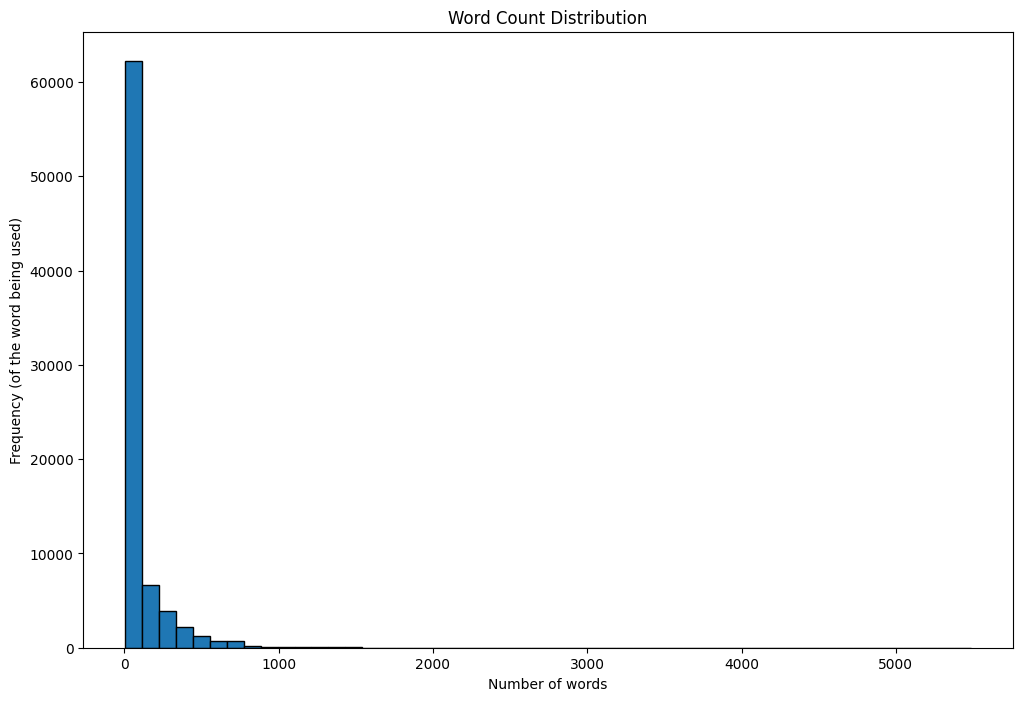

In [16]:
# word count distribution
final_df['word_count'] = final_df['comb_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12,8))
plt.hist(final_df['word_count'],bins=50, edgecolor ='black')
plt.title('Word Count Distribution')
plt.xlabel('Number of words')
plt.ylabel('Frequency (of the word being used)')
plt.show()

In [17]:
# n-grams distribution
from nltk.util import ngrams
from collections import Counter

def extract_ngrams(text):
    words = nltk.word_tokenize(text)
    bigrams = list(ngrams(words,2))
    trigrams = list(ngrams(words,3))
    return pd.Series([bigrams, trigrams], index=['bigrams', 'trigrams'])

final_df[['bigrams','trigrams']] = final_df['comb_text'].apply(extract_ngrams)

In [18]:
all_bigrams = [bigrams for sublist in final_df['bigrams'] for bigrams in sublist]
bigram_counts = Counter(all_bigrams)

all_trigrams = [trigrams for sublist in final_df['trigrams'] for trigrams in sublist]
trigram_counts = Counter(all_trigrams)

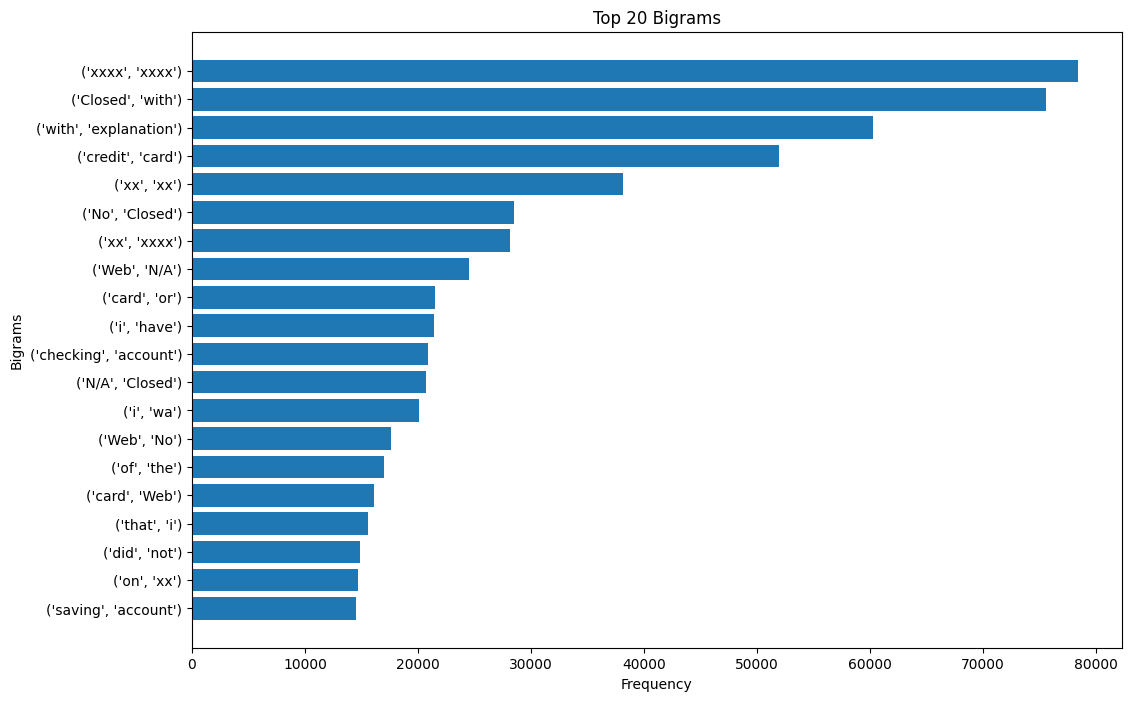

In [19]:
plt.figure(figsize=(12, 8))
common_bigrams = bigram_counts.most_common(20)  # Display the top 20 common bigrams
bigram_labels, bigram_values = zip(*common_bigrams)

plt.barh(range(len(bigram_labels)), bigram_values)
plt.yticks(range(len(bigram_labels)), bigram_labels)
plt.title('Top 20 Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()


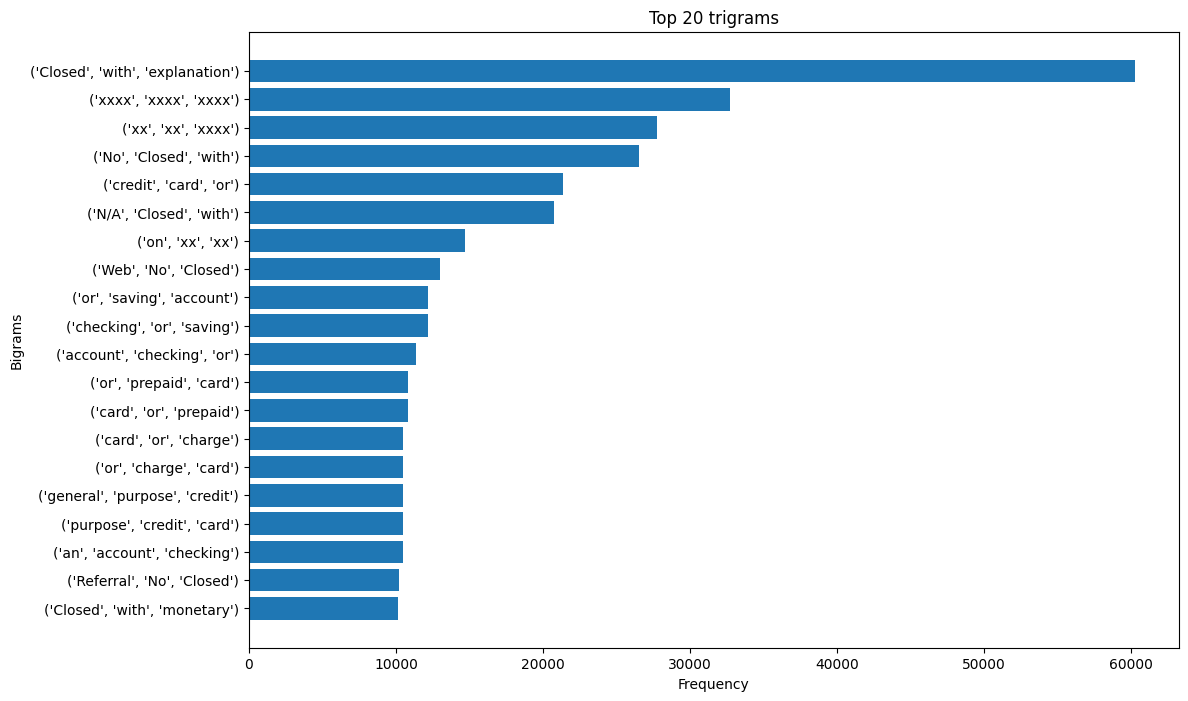

In [20]:
plt.figure(figsize=(12, 8))
common_trigrams = trigram_counts.most_common(20) 
trigram_labels, trigram_values = zip(*common_trigrams)

plt.barh(range(len(trigram_labels)), trigram_values)
plt.yticks(range(len(trigram_labels)), trigram_labels)
plt.title('Top 20 trigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.gca().invert_yaxis()  # Invert the y-axis for better readability
plt.show()

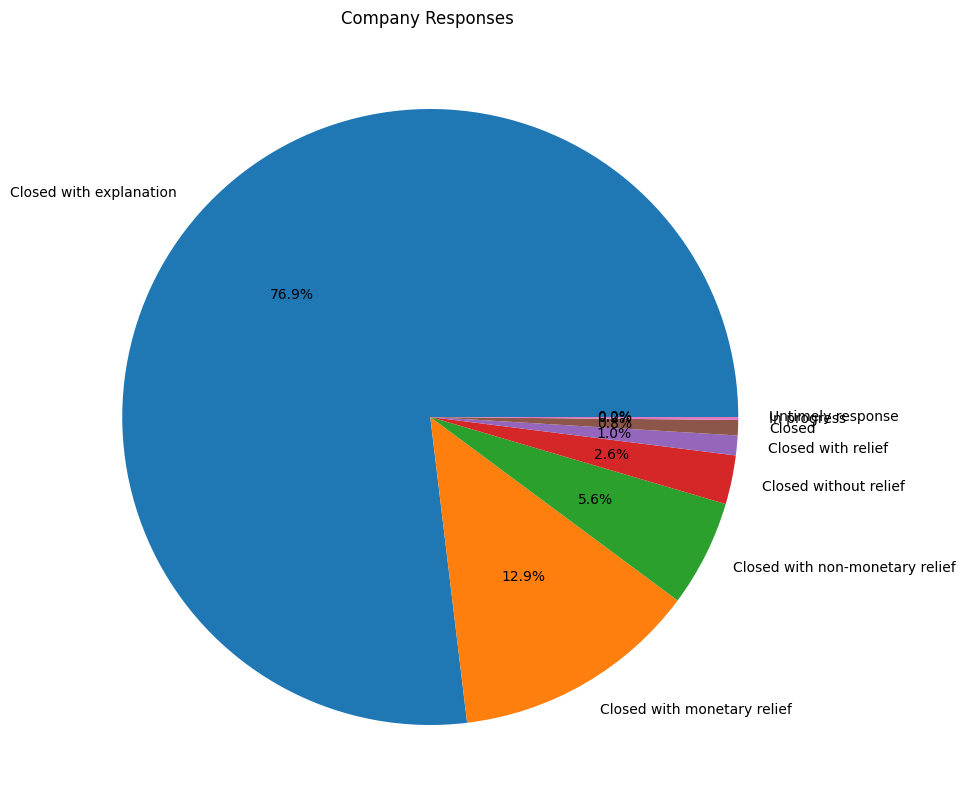

In [22]:
company_response = final_df['company_response'].value_counts()

plt.figure(figsize=(10,10))
plt.pie(company_response, labels = company_response.index, autopct= '%1.1f%%')
plt.title('Company Responses ')
plt.show()

In [23]:
company_response

company_response
Closed with explanation            60230
Closed with monetary relief        10129
Closed with non-monetary relief     4383
Closed without relief               2009
Closed with relief                   813
Closed                               628
In progress                          119
Untimely response                      2
Name: count, dtype: int64

### Part 5 || Feature Extraction

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df= 0.6, min_df=2 , stop_words='english')

dtm = tfidf.fit_transform(final_df['comb_text']) # document term matrix



### Part 6 || Topic Modelling

In [25]:
from sklearn.decomposition import NMF

In [26]:
nmf_model = NMF(n_components = 5, random_state=42)
nmf_model.fit(dtm)

NMF(n_components=5, random_state=42)

In [27]:
for index,topic in enumerate(nmf_model.components_):
    print(f"The top 15 words for topic number {index}")
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')

The top 15 words for topic number 0
['relief', 'fha', 'arm', 'adjustable', 'fl', 'yes', 'fixed', 'ca', 'conventional', 'referral', 'loan', 'collection', 'foreclosure', 'modification', 'mortgage']


The top 15 words for topic number 1
['ca', 'monetary', 'relief', 'management', 'opening', 'closing', 'managing', 'referral', 'deposit', 'withdrawal', 'saving', 'service', 'bank', 'checking', 'account']


The top 15 words for topic number 2
['billing', 'company', 'shown', 'monetary', 'relief', 'dispute', 'problem', 'statement', 'purchase', 'charge', 'purpose', 'general', 'prepaid', 'credit', 'card']


The top 15 words for topic number 3
['check', 'time', 'credit', 'payment', 'did', 'told', 'bank', 'money', 'report', '00', 'dollar', 'wa', 'chase', 'xx', 'xxxx']


The top 15 words for topic number 4
['relief', 'ca', 'trouble', 'yes', 'process', 'home', 'referral', 'fixed', 'account', 'conventional', 'loan', 'payment', 'servicing', 'escrow', 'mortgage']




#### estimate topic models
Topic 0 -> Mortgage / Loan
####
Topic 1 -> Bank account Services
####
Topic 2 -> Credit card / Prepaid card
####
Topic 3 -> other
####
Topic 4 ->Theft / Dispute reporting

In [29]:
topic_results = nmf_model.transform(dtm)
final_df['Topic'] = topic_results.argmax(axis=1)
final_df[['comb_text','Topic']]

,comb_text,Topic
0,CA attempt to collect debt not owed debt colle...,2
1,Servicemember GA written notification about de...,3
2,TX other feature term or problem credit ca...,3
3,MI trouble during payment process mortgage c...,4
4,NY fee or interest credit card or prepaid card...,2
...,...,...
78308,NJ closing an account checking or saving accou...,1
78309,CA other feature term or problem credit ca...,3
78310,CA problem with a lender or other company char...,3
78311,PA other feature term or problem credit ca...,3


In [30]:
#pos tagging takes too much time 

# from nltk import word_tokenize, pos_tag
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

# def doc_feat(q):
#     tokens = word_tokenize(q)
#     pos_tags = pos_tag(tokens)

#     pos_feature = ' '.join([tag for word,tag in pos_tags])

#     return pos_feature

# final_df['pos_tags'] = final_df['comb_text'].dropna().astype(str).apply(doc_feat)

### Part 7 || Model building with supervised learning (preparing text)

In [31]:
X = final_df['comb_text'].values
X

array(['CA attempt to collect debt not owed debt collection debt is not yours credit card debt Web N/A  Closed with explanation',
       'Servicemember GA written notification about debt debt collection did  not receive enough information to verify debt credit card debt Web N/A good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember service   in 2018 i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable   i am asking the bank to validate the debt   instead i been receiving mail every month from them attempting to collect a debt   i have a right to know this information a a consumer   chase account   xxxx xxxx xxxx xxxx thanks in advance for your help Closed with explanation',
       'TX other feature   term   or problem credit card or prepaid card problem with reward from credit card general purpose credit card or charge card Web N/A i upgraded my xxxx xxxx card in xx xx 2018 and wa

In [32]:
len(X)

78313

In [33]:
y = final_df['Topic'].values
y

array([2, 3, 3, ..., 3, 3, 3])

In [34]:
len(y)

78313

In [35]:
tf_model = TfidfVectorizer(max_features = 5000)
X_data = tf_model.fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y , test_size=0.2,random_state=42)

In [37]:
print('X train shape: ', X_train.shape)
print('X test shape: ', X_test.shape)
print('y train shape: ', y_train.shape)
print('y test shape: ', y_test.shape)

X train shape:  (62650, 5000)
X test shape:  (15663, 5000)
y train shape:  (62650,)
y test shape:  (15663,)


### Part 8 || Model Training and evaluation

#### i. Logistic Regression

In [38]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression(max_iter=10)
clf1.fit(X_train,y_train)

LogisticRegression(max_iter=10)

In [39]:
cv_scores = cross_val_score(clf1, X_train, y_train, cv = 10)
print('cv scores: ', cv_scores)
print('Mean cv score: ', cv_scores.mean())
print('Standard deviation of cv score: ', cv_scores.std())

cv scores:  [0.97701516 0.97350359 0.9792498  0.97318436 0.97621708 0.97270551
 0.97478053 0.97254589 0.97238627 0.9763767 ]
Mean cv score:  0.9747964884277733
Standard deviation of cv score:  0.002208777523335084


In [40]:
accuracy1 = clf1.score(X_test,y_test)
print("Accuracy : ",accuracy1)

Accuracy :  0.9721636978867394


In [41]:
pred1 = clf1.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

print('Classidication report: ')
print(classification_report(y_test,pred1))

Classidication report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2393
           1       0.99      0.97      0.98      3409
           2       0.98      0.98      0.98      4219
           3       0.94      0.95      0.94      3463
           4       0.99      0.98      0.98      2179

    accuracy                           0.97     15663
   macro avg       0.97      0.97      0.97     15663
weighted avg       0.97      0.97      0.97     15663



#### ii.Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier(random_state=42)
clf2.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

In [43]:
cv_scores = cross_val_score(clf2,X_train,y_train, cv=10)
print('cv scores: ', cv_scores)
print('Mean cv score: ', cv_scores.mean())
print('Standard deviation of cv score: ', cv_scores.std())

cv scores:  [0.96903432 0.96951317 0.97318436 0.97270551 0.97302474 0.97318436
 0.9707901  0.96759777 0.96999202 0.97031125]
Mean cv score:  0.9709337589784516
Standard deviation of cv score:  0.0018892198163310938


In [44]:
accuracy2 = clf2.score(X_test,y_test)
print("Accuracy : ",accuracy2)

Accuracy :  0.9729936793717678


In [45]:
pred2 = clf2.predict(X_test)

print('Classidication report: ')
print(classification_report(y_test,pred2))

Classidication report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2393
           1       0.98      0.98      0.98      3409
           2       0.98      0.98      0.98      4219
           3       0.94      0.94      0.94      3463
           4       0.98      0.98      0.98      2179

    accuracy                           0.97     15663
   macro avg       0.97      0.97      0.97     15663
weighted avg       0.97      0.97      0.97     15663



#### iii.Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(random_state=42)
clf3.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [47]:
cv_scores = cross_val_score(clf3, X_train, y_train, cv = 10)
print('cv scores: ', cv_scores)
print('Mean cv score: ', cv_scores.mean())
print('Standard deviation of cv score: ', cv_scores.std())

cv scores:  [0.96264964 0.95865922 0.96296887 0.96552275 0.96073424 0.96568236
 0.96951317 0.96312849 0.96312849 0.96328811]
Mean cv score:  0.9635275339185952
Standard deviation of cv score:  0.002782329401181734


In [48]:
accuracy3 = clf3.score(X_test,y_test)
print("Accuracy : ",accuracy3)

Accuracy :  0.9621400753367809


In [49]:
pred3 = clf3.predict(X_test)

print('Classidication report: ')
print(classification_report(y_test,pred3))

Classidication report: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2393
           1       1.00      0.95      0.97      3409
           2       0.99      0.94      0.97      4219
           3       0.87      0.98      0.92      3463
           4       1.00      0.96      0.98      2179

    accuracy                           0.96     15663
   macro avg       0.97      0.96      0.97     15663
weighted avg       0.97      0.96      0.96     15663



#### iv.Naive Bayes


In [50]:
from sklearn.naive_bayes import MultinomialNB
clf4 = MultinomialNB()
clf4.fit(X_train,y_train)

MultinomialNB()

In [51]:
cv_scores = cross_val_score(clf4, X_train, y_train, cv = 5)
print('cv scores: ', cv_scores)
print('Mean cv score: ', cv_scores.mean())
print('Standard deviation of cv score: ', cv_scores.std())

cv scores:  [0.92857143 0.93144453 0.92889066 0.93431764 0.93200319]
Mean cv score:  0.931045490822027
Standard deviation of cv score:  0.002123564995315256


In [52]:
accuracy4 = clf4.score(X_test,y_test)
print("Accuracy : ",accuracy4)

Accuracy :  0.9286854370171742


In [53]:
pred4 = clf4.predict(X_test)

print('Classidication report: ')
print(classification_report(y_test,pred4))

Classidication report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2393
           1       1.00      0.92      0.96      3409
           2       0.96      0.88      0.92      4219
           3       0.79      0.97      0.87      3463
           4       1.00      0.92      0.96      2179

    accuracy                           0.93     15663
   macro avg       0.94      0.93      0.94     15663
weighted avg       0.94      0.93      0.93     15663



### Part 9 || Model Inference

In [57]:
import pickle

# Assuming 'model' is your trained linear regression model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(clf1, file)


In [94]:
unseen_data = {
    "text": [
        "credit card transaction unsuccessful",
        "opening a savings account",
        "trouble processing account",
        "foreclosure and modification regarding a loan",
        "time of servicing",
    ],
    "topic": [2, 1, 4, 0, 3],
}

test_df = pd.DataFrame(unseen_data)
test_df

,text,topic
0,credit card transaction unsuccessful,2
1,opening a savings account,1
2,trouble processing account,4
3,foreclosure and modification regarding a loan,0
4,time of servicing,3


In [95]:
X = test_df['text'].values
y = test_df['topic'].values

In [96]:
unseen_data_input = tf_model.transform(X)
print(unseen_data_input.shape)



(5, 5000)


In [97]:
y.shape

(5,)

In [98]:
with open('logistic_regression_model.pkl', 'rb') as file:
    model = pickle.load(file)

unseen_pred = model.predict(unseen_data_input)
unseen_pred


array([2, 1, 1, 0, 4])